# 03 - Evaluation & Scenario Simulator

In [2]:
# === Setup de rutas y guardado interno ===
import sys
from pathlib import Path
cwd = Path.cwd().resolve()
project_root = None
for p in [cwd] + list(cwd.parents):
    if (p / "src").exists():
        project_root = p; break
if project_root is None:
    project_root = Path("/content/drive/MyDrive/Proyecto 4")
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
from src.utils.helpers import ensure_dirs
ensure_dirs(project_root / "data/processed", project_root / "models/trained_models",
            project_root / "models/model_configs", project_root / "docs")
print(" Project root:", project_root)

 Project root: /content/drive/MyDrive/Proyecto 4


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   price  total_revenue  total_margin
0      8  138385.623724  51894.608896
1     10  138385.623724  69192.811862
2     12  138385.623724  80724.947172
3     14  138385.623724  88962.186680


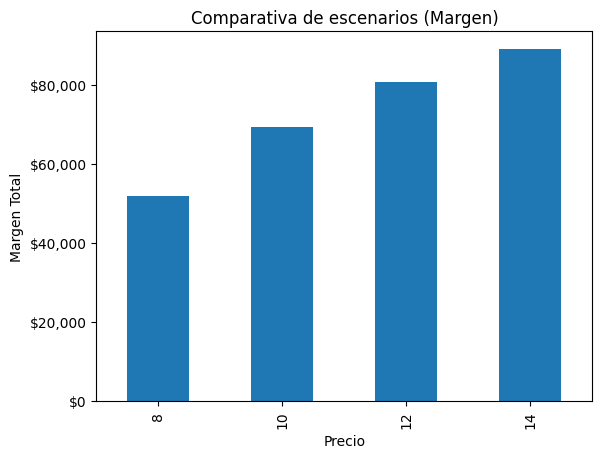

Reporte exportado a /content/drive/MyDrive/Proyecto 4/docs/reporte_impacto_financiero.csv


In [4]:
import pandas as pd, numpy as np
from pathlib import Path
fcst_path = project_root / 'models' / 'trained_models' / 'prophet_fcst.csv'
if fcst_path.exists():
    fcst = pd.read_csv(fcst_path)
    if 'forecast' not in fcst.columns and 'yhat' in fcst.columns:
        fcst = fcst.rename(columns={'ds':'date','yhat':'forecast'})
else:
    dates = pd.date_range('2024-01-01', periods=30, freq='D')
    fcst = pd.DataFrame({'date':dates, 'forecast':np.random.randint(80,120,size=30)})
cost = 5.0
price_scenarios = [8, 10, 12, 14]
rows = []
for p in price_scenarios:
    demand = (fcst['forecast'] * (12/p)).clip(lower=0)
    revenue = p * demand
    margin = (p - cost) * demand
    rows.append({'price': p, 'total_revenue': float(revenue.sum()), 'total_margin': float(margin.sum())})
res = pd.DataFrame(rows); print(res)
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
ax = res.set_index('price')['total_margin'].plot(kind='bar')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.title('Comparativa de escenarios (Margen)'); plt.xlabel('Precio'); plt.ylabel('Margen Total')
plt.show()
out = project_root / 'docs' / 'reporte_impacto_financiero.csv'
res.to_csv(out, index=False); print('Reporte exportado a', out)